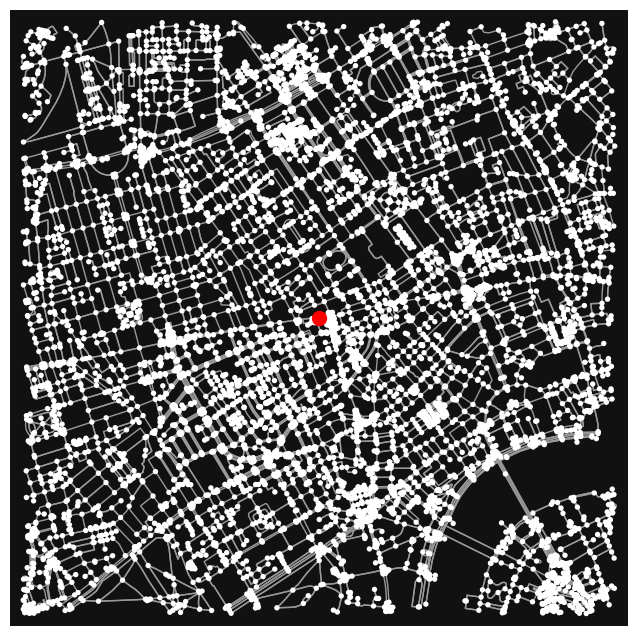

In [6]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx


centre_point = (51.51635767783695, -0.1311754883273925)


# Download the street network for the specified location
# Using the average of the two latitudes and longitudes to center the graph
G = ox.graph_from_point(centre_point, dist=1500, network_type='all')

# Plot the network with the closest nodes highlighted
fig, ax = ox.plot_graph(G, show=False, close=False)

# Plot the first set of coordinates in red and its closest node in blue
ax.scatter(centre_point[1], centre_point[0], c='red', s=100)

plt.show()

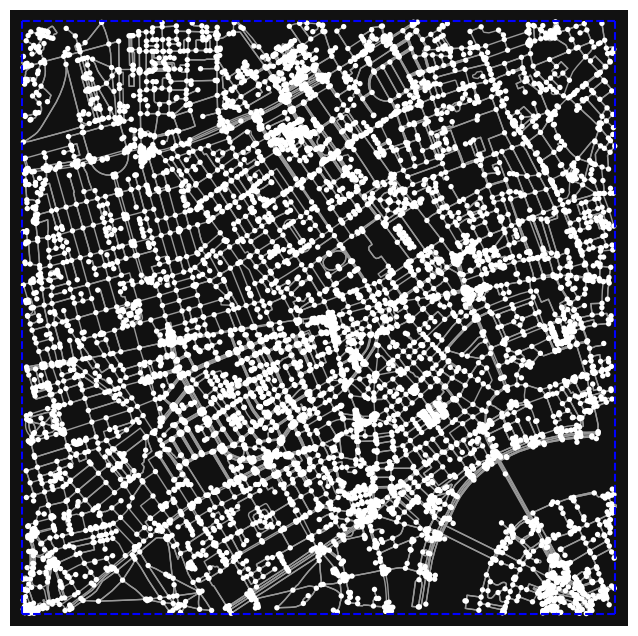

In [8]:
import numpy as np

dist = 1500


# Calculate the approximate change in latitude and longitude for the given distance
delta_lat = dist / 111000  # degrees of latitude per meter
# For longitude, we need to multiply by the cosine of the latitude
delta_lon = dist / (111000 * np.cos(centre_point[0] * np.pi / 180))

# Calculate the bounding box
north = centre_point[0] + delta_lat
south = centre_point[0] - delta_lat
east = centre_point[1] + delta_lon
west = centre_point[1] - delta_lon

# Generate the four corner points of the bounding box
corner_points = [(north, east), (north, west), (south, west), (south, east)]

# Plot the network
fig, ax = ox.plot_graph(G, show=False, close=False)

# Plot the bounding box by connecting the corner points
for i, point in enumerate(corner_points):
    next_point = corner_points[(i + 1) % len(corner_points)]
    x = [point[1], next_point[1]]
    y = [point[0], next_point[0]]
    ax.plot(x, y, 'b--')  # plot with blue dashed line

# Show the plot
plt.show()



# Some Rules

For a waypoint to be a valid incognito waypoint it can't add more than X% time to the journey and the route has to be continuos - which is defined as no U turn (can't revisit the node that you went by)

Random Point 1: Latitude 51.5140805421089, Longitude -0.13683624774339737
Random Point 2: Latitude 51.52030080490748, Longitude -0.15083531559777533


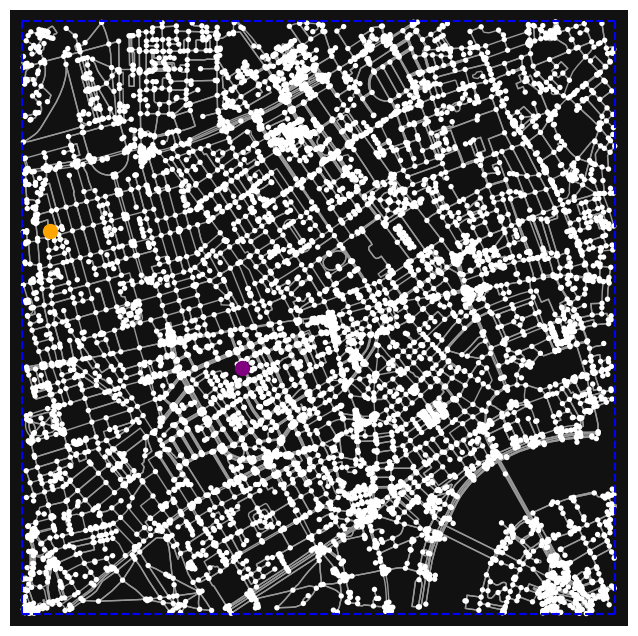

In [11]:
import random

# Function to generate a random point within the bounding box
def generate_random_point_within_bounds(north, south, east, west):
    random_lat = random.uniform(south, north)
    random_lon = random.uniform(west, east)
    return random_lat, random_lon

# Generate two random points
random_point1 = generate_random_point_within_bounds(north, south, east, west)
random_point2 = generate_random_point_within_bounds(north, south, east, west)

# Print the random points
print(f"Random Point 1: Latitude {random_point1[0]}, Longitude {random_point1[1]}")
print(f"Random Point 2: Latitude {random_point2[0]}, Longitude {random_point2[1]}")

# Get the closest nodes

# Find the closest node to the first set of coordinates
closest_node1 = ox.distance.nearest_nodes(G, X=random_point1[1], Y=random_point1[0])
closest_node2 = ox.distance.nearest_nodes(G, X=random_point2[1], Y=random_point2[0])

# Plot the network
fig, ax = ox.plot_graph(G, show=False, close=False)

# Plot the bounding box by connecting the corner points
for i, point in enumerate(corner_points):
    next_point = corner_points[(i + 1) % len(corner_points)]
    x = [point[1], next_point[1]]
    y = [point[0], next_point[0]]
    ax.plot(x, y, 'b--')  # plot with blue dashed line

# Plot the random points
ax.scatter(random_point1[1], random_point1[0], c='purple', s=100, zorder=3)  # Random Point 1
ax.scatter(random_point2[1], random_point2[0], c='orange', s=100, zorder=3)  # Random Point 2

# Show the plot
plt.show()
